# importing the Dependencies

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay , classification_report ,f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# loading the data set

In [2]:
credit_card_data=pd.read_csv('creditcard_2023.csv')

# first five rows of the dataset

In [4]:
credit_card_data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [5]:
credit_card_data.tail()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1
568629,568629,-0.795144,0.433236,-0.649140,0.374732,-0.244976,-0.603493,-0.347613,-0.340814,0.253971,...,0.534853,-0.291514,0.157303,0.931030,-0.349423,-1.090974,-1.575113,0.722936,21493.92,1


# dataset information

In [6]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

# checking the numbers of missing value 

In [7]:
credit_card_data.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# distribution of legit transaction and fraudulent transaction

In [11]:
credit_card_data['Class'].value_counts()

0    284315
1    284315
Name: Class, dtype: int64

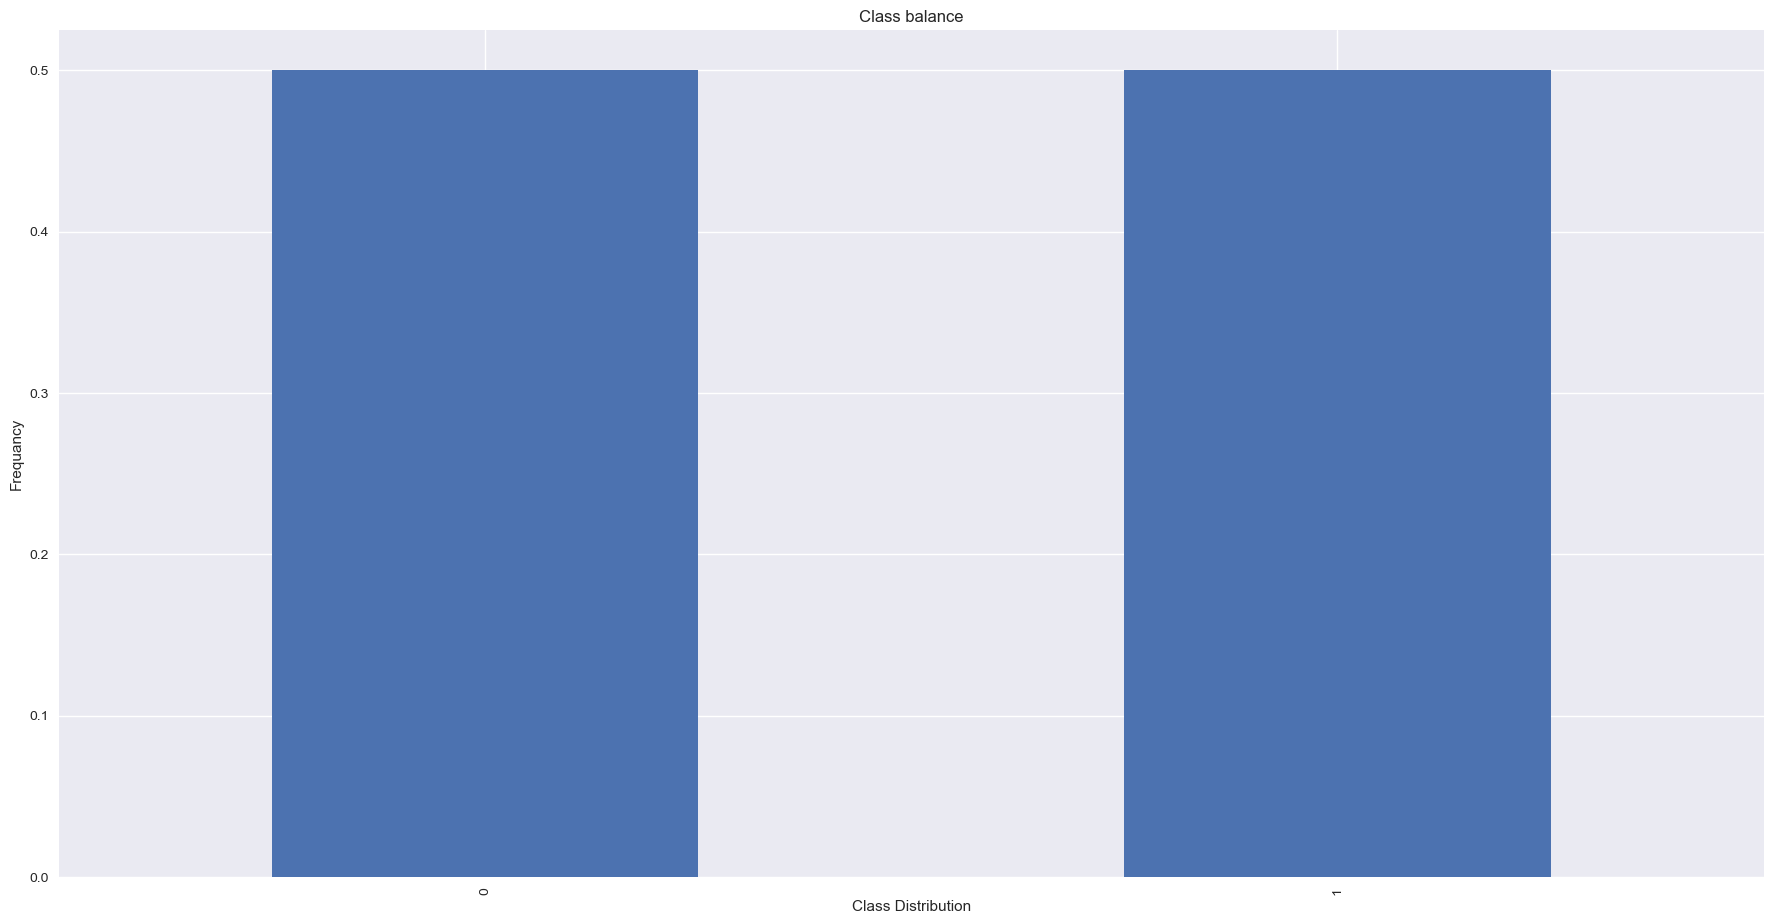

In [22]:
#calculating the relative frequencies of the classes
credit_card_data['Class'].value_counts(normalize= True).plot(kind= 'bar')
plt.xlabel("Class Distribution")
plt.ylabel("Frequancy")
plt.title("Class balance");

In [19]:
credit_card_data.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


C:\Users\HP\AppData\Local\Temp\ipykernel_190640\621237142.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


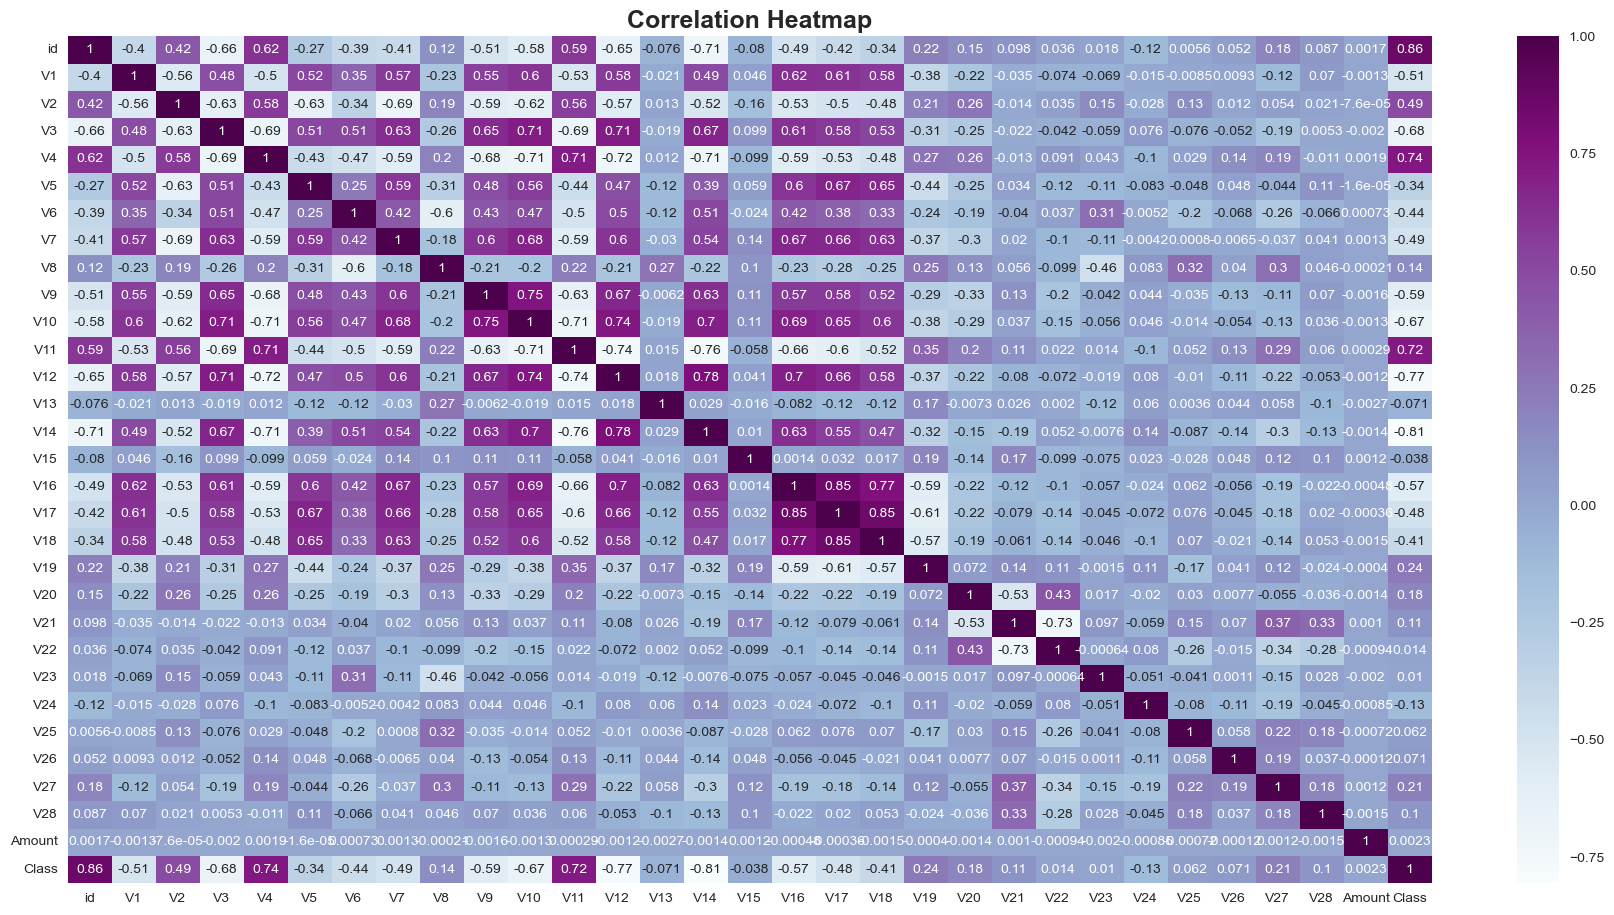

In [20]:
#corr = df.drop(columns=['Class']).corr()
#sns.heatmap(corr);
plt.style.use("seaborn")

plt.rcParams['figure.figsize']= (22,11)

plt.title("Correlation Heatmap",fontsize=18, weight= 'bold')

sns.heatmap(credit_card_data.corr(), cmap="BuPu", annot=True)

plt.show()

In [23]:
x = credit_card_data.drop(['id', 'Class'], axis=1)
y=credit_card_data['Class']

In [30]:
scaler=StandardScaler()

In [31]:
x_scaled=scaler.fit_transform(x)

In [32]:
print(x_scaled)

[[-0.2606478  -0.46964845  2.49626608 ... -0.08123011 -0.15104549
   0.85844694]
 [ 0.98509973 -0.35604509  0.55805635 ... -0.24805206 -0.06451192
  -0.79636931]
 [-0.26027161 -0.94938461  1.72853778 ... -0.30025804 -0.24471823
  -1.37701093]
 ...
 [-0.31199739 -0.00409479  0.13752559 ... -0.48753975 -0.26874127
   1.66640101]
 [ 0.63687054 -0.51696952 -0.30088853 ... -0.15926926 -0.07625057
  -0.27185346]
 [-0.79514417  0.43323608 -0.64914005 ... -1.5751126   0.7229365
   1.3659619 ]]


In [33]:
X=pd.DataFrame(x_scaled,columns=x.columns)

In [37]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (568630, 29)
y shape: (568630,)


In [40]:
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (454904, 29)
y_train: (454904,)
X_test: (113726, 29)
y_test: (113726,)


In [41]:
model=LogisticRegression()

In [42]:
model.fit(X_train, y_train)

LogisticRegression()

In [43]:
y_pred=model.predict(X_test)

In [44]:
print(y_pred)

[1 1 0 ... 1 1 0]


In [45]:
print(y_test)

437378    1
504222    1
4794      0
388411    1
424512    1
         ..
172633    0
183013    0
484066    1
426713    1
272068    0
Name: Class, Length: 113726, dtype: int64


In [47]:
df=pd.DataFrame({'Predicted value':y_pred, 'Actual value':y_test})

In [48]:
print(df)

        Predicted value  Actual value
437378                1             1
504222                1             1
4794                  0             0
388411                1             1
424512                1             1
...                 ...           ...
172633                0             0
183013                0             0
484066                1             1
426713                1             1
272068                0             0

[113726 rows x 2 columns]


In [49]:
model.predict(X_train)

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [50]:
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)

In [51]:
print('Training Accuracy:', train_acc)
print('Testing Accuracy:', test_acc)

Training Accuracy: 0.9649200710479574
Testing Accuracy: 0.9652761901412166


In [52]:
#print(f"Training accuracy: {round(acc_train , 4)}")
#print(f"test accuracy: {round(acc_test , 4)}")

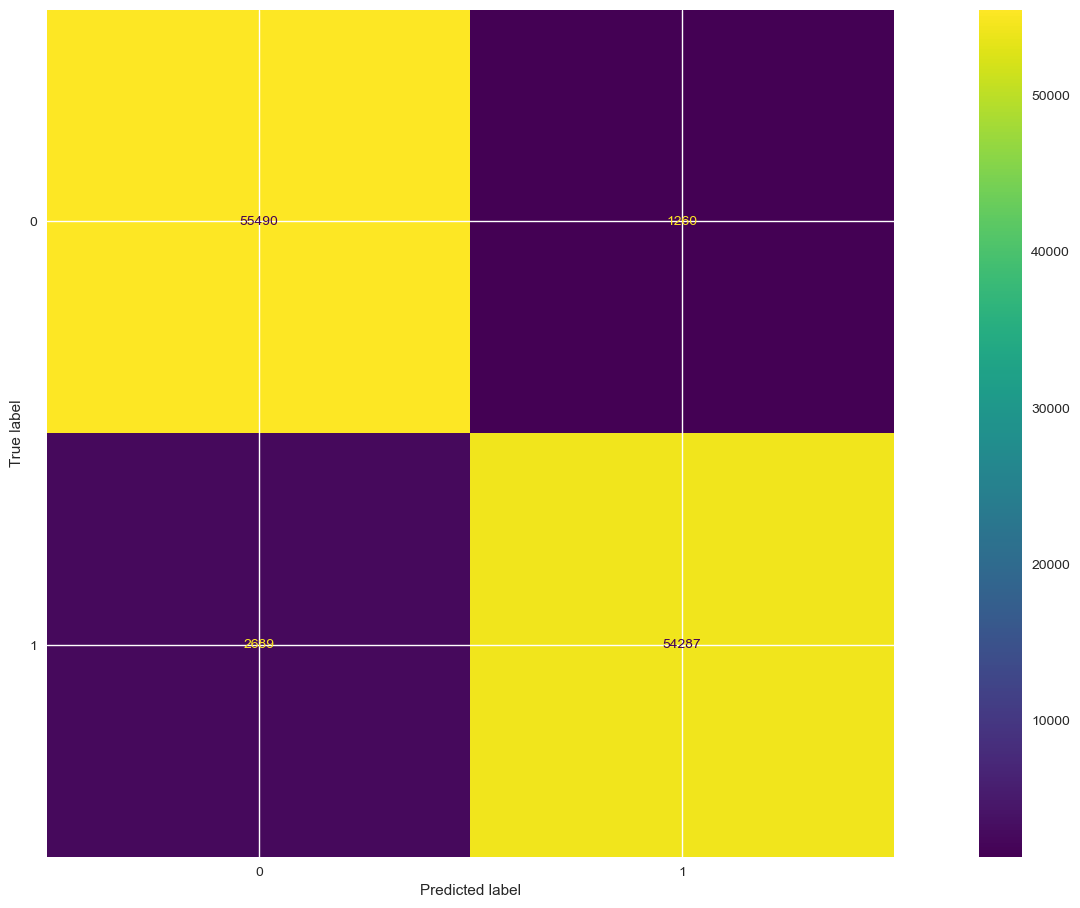

In [53]:
ConfusionMatrixDisplay.from_estimator(

    model,
    X_test,
    y_test
    
);

In [54]:
print(classification_report(

    y_test,
    model.predict(X_test)

))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     56750
           1       0.98      0.95      0.96     56976

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726

